# Analyse der Bußgelddaten Köln 2018 (ruhender Verkehr)
* https://www.offenedaten-koeln.de/dataset/bu%C3%9Fgelddaten-koeln-2018



In [1]:
import pandas as pd
import glob

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', -1)

In [3]:
files= glob.glob("bugelddaten-koeln-2018-All-2020-01-18_2311\*.csv")
#print (files)

In [4]:
df_all = pd.DataFrame()
for f in files:
    df_f=pd.read_csv(f, sep=';')
    
    df_all=df_all.append(df_f, ignore_index=True)
df_all.head()

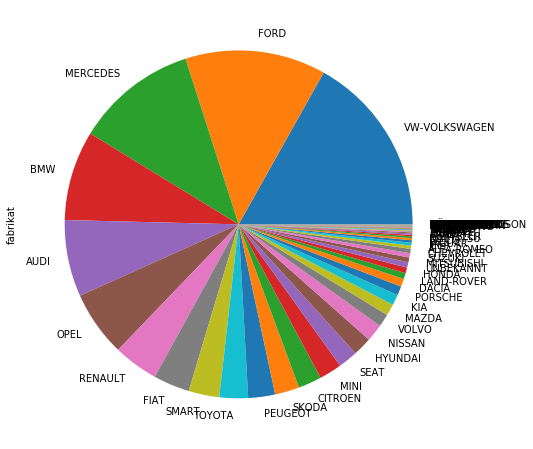

In [5]:
df_all.fabrikat.value_counts().plot(kind='pie', figsize=(8,8))

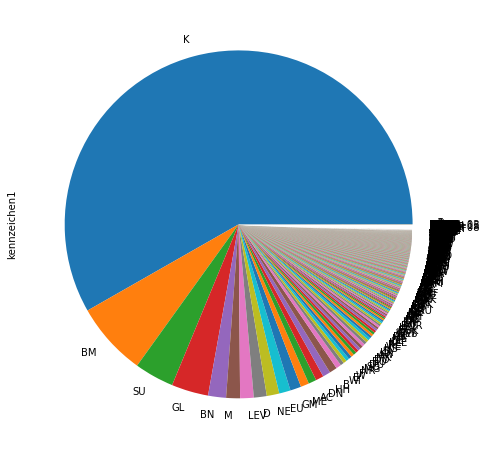

In [6]:
df_all['kennzeichen1'].value_counts().plot(kind='pie', figsize=(8,8))

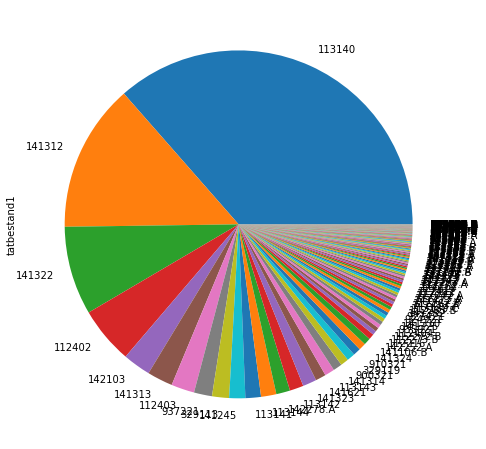

In [7]:
df_all['tatbestand1'].value_counts().plot(kind='pie', figsize=(8,8))

In [5]:
len(df_all)
"Gesamtanzahl {}".format(len(df_all))


'Gesamtanzahl 839562'

### Orden der OWI-Nummer den Tatbestand und die Bußgeldhöhe zu
#### Quellen dafür sind:
* https://www.kba.de/DE/ZentraleRegister/FAER/BT_KAT_OWI/btkat_node.html
* https://fragdenstaat.de/anfrage/dienstanweisungen-und-schulungsunterlagen-des-ordnungs-und-verkehrsdienstes/137037/anhang/DienstanweisungVKKln_mitWZ.pdf

Details siehe [digitalisiere die OWI Tabelle](#digitalisiere-die-OWI-Tabelle)

In [6]:
df_1_m = pd.read_csv('bkat_owi.csv')

In [7]:
# entferne .A und .B appendix
df_all=df_all.tatbestand1.apply(lambda x: x[:-2] if x[-2:-1]=='.' else x)

In [8]:
df_all_m= pd.merge(df_all,df_1_m, left_on='tatbestand1', right_on='TBNR', how='left')

In [9]:
len(df_all_m)

839562

In [10]:
"{} nicht zugeortnete OWIs".format(len(df_all_m[df_all_m['Euro'].isna()]))
#df_all_m[df_all_m['Euro'].isna()].tatbestand1.value_counts()

'5021 nicht zugeortnete OWIs'

In [11]:
#df_all_m['Euro'].value_counts(dropna=False)

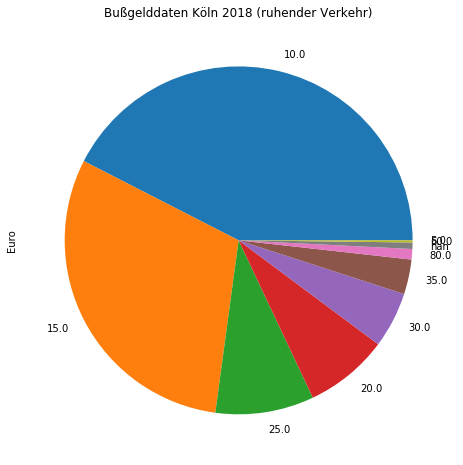

In [12]:
df_all_m['Euro'].value_counts(dropna=False).plot(kind='pie', 
                                                 figsize=(8,8), 
                                                 title='Bußgelddaten Köln 2018 (ruhender Verkehr)')

In [13]:
len(df_all_m['Euro'])

839562

In [14]:
per_unter15=len(df_all_m[df_all_m['Euro']<=15]) / len(df_all_m)

"{:.1%} der Parkverstöße werden mit <= 15 Euro geahndet.".format(per_unter15)


'72.9% der Parkverstöße werden mit <= 15 Euro geahndet.'

In [15]:
res=pd.merge(df_all_m['Tatbestandstext'].value_counts().reset_index(),
             df_all_m[['Tatbestandstext','Euro']],
             left_on='index', 
             right_on='Tatbestandstext'
            ).drop_duplicates('index')

In [16]:
res=res.rename(columns={'index':'Tatbestandstext','Tatbestandstext_x':'Anzahl'})
res=res.reset_index()
res=res.drop(columns=['Tatbestandstext_y','index'])

### Die Top10 Tatbestände:

In [17]:
display(res[:10])

,Tatbestandstext,Anzahl,Euro
0,"Sie parkten im Bereich eines Parkscheinautomaten ohne gültigen Parkschein. § 13 Abs. 1, 2, § 49 StVO; § 24 StVG; 63.1 BKat Tab.: 713002",306148,10.0
1,"Sie parkten im absoluten Haltverbot (Zeichen 283). § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 52 BKat Tab.: 741017",115500,15.0
2,"Sie parkten unzulässig im eingeschränkten Haltverbot (Zeichen 286). § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 52 BKat Tab.: 741018",69150,15.0
3,"Sie parkten verbotswidrig auf dem Gehweg. § 12 Abs. 4, § 49 StVO; § 24 StVG; 52a BKat Tab.: 712031",44354,20.0
4,"Sie parkten in einem verkehrsberuhigten Bereich (Zeichen 325.1, 325.2) verbotswidrig außerhalb der zum Parken gekennzeichneten Flächen. § 42 Abs. 2 iVm Anlage 3, § 49 StVO; § 24 StVG; 159 BKat Tab.: 742108",21771,10.0
5,"Sie parkten im absoluten Haltverbot (Zeichen 283) und behinderten +) dadurch Andere. § 41 Abs. 1 iVm Anlage 2, § 1 Abs. 2, § 49 StVO; § 24 StVG; 52.1 BKat; § 19 OWiG Tab.: 741017",19969,25.0
6,"Sie parkten verbotswidrig auf dem Gehweg und behinderten +) dadurch Andere. § 12 Abs. 4, § 1 Abs. 2, § 49 StVO; § 24 StVG; 52a.1 BKat; § 19 OWiG Tab.: 712031",18104,30.0
7,"Sie parkten nicht auf dem rechten Seitenstreifen bzw am rechten Fahrbahnrand sondern § 24 StVG, § 12 Abs. 4, § 49 StVO",14091,15.0
8,"Sie unterließen es, das Fahrzeug, für das nach Nr. 2.1 der Anlage VIII *) keine Sicherheitsprüfung vorgeschrieben ist, zur fälligen Hauptuntersuchung vorzuführen. Der Termin **) war um mehr als 2 bis zu 4 Monate überschritten. § 29 Abs. 1, § 69a StVZO; § 24 StVG; 186.2.1 BKat",13277,15.0
9,"Sie benutzten die Sperrfläche (Zeichen 298) zum Parken. § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 156 BKat",12501,25.0


In [18]:
res.reset_index()

,index,Tatbestandstext,Anzahl,Euro
0,0,"Sie parkten im Bereich eines Parkscheinautomaten ohne gültigen Parkschein. § 13 Abs. 1, 2, § 49 StVO; § 24 StVG; 63.1 BKat Tab.: 713002",306148,10.0
1,1,"Sie parkten im absoluten Haltverbot (Zeichen 283). § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 52 BKat Tab.: 741017",115500,15.0
2,2,"Sie parkten unzulässig im eingeschränkten Haltverbot (Zeichen 286). § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 52 BKat Tab.: 741018",69150,15.0
3,3,"Sie parkten verbotswidrig auf dem Gehweg. § 12 Abs. 4, § 49 StVO; § 24 StVG; 52a BKat Tab.: 712031",44354,20.0
4,4,"Sie parkten in einem verkehrsberuhigten Bereich (Zeichen 325.1, 325.2) verbotswidrig außerhalb der zum Parken gekennzeichneten Flächen. § 42 Abs. 2 iVm Anlage 3, § 49 StVO; § 24 StVG; 159 BKat Tab.: 742108",21771,10.0
...,...,...,...,...
227,227,"Sie parkten im Bereich einer Parkraumbewirtschaftungszone (Zeichen 314.1, 314.2), ohne die Parkscheibe (Bild 318) richtig eingestellt zu haben - länger als 30 Minuten. § 13 Abs. 1, 2, § 49 StVO; § 24 StVG; 63.2 BKat Tab.: 713016",1,15.0
228,228,"Sie hielten innerhalb einer Grenzmarkierung (Zeichen 299) für ein Haltverbot. § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 51 BKat Tab.: 741021",1,10.0
229,229,"Sie hielten verbotswidrig innerhalb des Kreisverkehrs auf der Fahrbahn. § 41 Abs. 1 iVm Anlage 2, § 49 StVO; § 24 StVG; 51 BKat Tab.: 741023",1,10.0
230,230,"Sie hielten verbotswidrig im Bereich einer Feuerwehranfahrtszone/ einer Feuerwehrzufahrt/eines Rettungsweges *) (Zeichen 283 mit Zusatzzeichen) und behinderten +) dadurch ein Rettungsfahrzeug im Einsatz. § 41 Abs. 1 iVm Anlage 2, § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat; § 19 OWiG Tab.: 741037",1,15.0


In [19]:
res=res.reset_index()
res=res.rename(columns=({'index':'Rang'}))

In [20]:
res.Rang=res.Rang+1

In [21]:
res['rel']=res.Anzahl/res.Anzahl.sum()

In [22]:
res[:10].Anzahl.sum()

634865

In [25]:
res['Summe']=res['Anzahl']*res['Euro']

In [26]:
res['Summe'].sum()

13630505.0

In [30]:
import altair as alt

source = res.sort_values('Euro')

chart= alt.Chart(source).mark_bar().encode(
    #x='Euro:O',
    #y='sum(Anzahl):Q',
    x=alt.X('Euro:O',title='Bußgelder [Euro]'),
    y=alt.Y('sum(Anzahl):Q',title='Anzahl Tatbestände', axis=alt.Axis(format='~s')),
    #y=alt.Y('sum(Anzahl):Q',title='Anzahl Tatbestände'),

    color=alt.Color('Rang:N', legend=None, sort="descending"),
    tooltip=['Tatbestandstext','Anzahl','Rang']
).interactive().properties(width=500, title='Bußgelddaten Köln 2018 (ruhender Verkehr)')


## Configure text
text=alt.Chart(source).mark_text(
                        color='black', 
                        baseline='top', 
                        opacity=0.7,
                        dy=-12
                        ).encode(
                            #text='sum(rel):Q',
                            text=alt.Text('sum(rel):Q',format='.1%'),
                            x='Euro:O',
                            y='sum(Anzahl):Q'
                            )

#.format(",.2r")

(chart+text).save('bussgelder_koeln_parken.html')
chart+text

alt.LayerChart(...)

---

### digitalisiere die OWI Tabelle

In [405]:
import tabula

In [406]:
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', -1)

In [407]:
#pages=['17-250'] #pages=['17-400']
pages=['17-454,456-490']

df_1 = tabula.read_pdf("bkat_owi_01_11_2017_pdf.pdf", 
                   pages=pages,
                   area=[ [80,12.75,630,561]],
                   columns=[100,400,450,500]
                  )

Got stderr: Jan 19, 2020 2:00:09 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
WARNUNG: ICC profile is Perceptual, ignoring, treating as Display class



In [408]:
df_1=df_1.dropna(how='all').copy()

df_1.TBNR=df_1.TBNR.apply(lambda x: None if x=='1)' else x)

df_1.TBNR=df_1.TBNR.fillna(method='ffill')
df_1.head()

,TBNR,Tatbestandstext,FaP-Pkt,Euro,FV
0,101000,Sie kamen von der Fahrbahn ab und verursachten Sachschaden.,0,"35,00",NaN
1,101000,"§ 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",NaN,NaN,NaN
3,101006,Sie gerieten ins Schleudern und verursachten Sachschaden.,0,"35,00",NaN
4,101006,"§ 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",NaN,NaN,NaN
6,101012,Sie streiften beim Vorbeifahren ein Fahrzeug und verursachten Sach-,0,"35,00",NaN


In [409]:
df_1_c=df_1.groupby(['TBNR'])['Tatbestandstext'].apply(lambda x: ' '.join(x)).reset_index()
df_1_c.head()

,TBNR,Tatbestandstext
0,101000,"Sie kamen von der Fahrbahn ab und verursachten Sachschaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat"
1,101006,"Sie gerieten ins Schleudern und verursachten Sachschaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat"
2,101012,"Sie streiften beim Vorbeifahren ein Fahrzeug und verursachten Sach- schaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat"
3,101018,"Sie ließen beim Befahren der Straße die im Verkehr erforderliche Rück- sicht außer Acht und beschmutzten dabei Andere. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat"
4,101024,"Sie stellten das Fahrzeug so ab, dass ein anderes Fahrzeug nicht weg- fahren konnte. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat"


In [410]:
df_1_m=pd.merge(df_1_c,df_1[['TBNR', 'FaP-Pkt', 'Euro', 'FV']], on='TBNR').drop_duplicates('Tatbestandstext')

df_1_m=df_1_m[df_1_m.TBNR!='TBNR'].copy()
df_1_m=df_1_m[df_1_m.Euro!='Seite 3'].copy()

df_1_m.Euro=df_1_m.Euro.str.replace(',','.').str.replace('(','').astype(float)

df_1_m.head()

,TBNR,Tatbestandstext,FaP-Pkt,Euro,FV
0,101000,"Sie kamen von der Fahrbahn ab und verursachten Sachschaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",0,35.0,NaN
2,101006,"Sie gerieten ins Schleudern und verursachten Sachschaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",0,35.0,NaN
4,101012,"Sie streiften beim Vorbeifahren ein Fahrzeug und verursachten Sach- schaden. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",0,35.0,NaN
7,101018,"Sie ließen beim Befahren der Straße die im Verkehr erforderliche Rück- sicht außer Acht und beschmutzten dabei Andere. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",0,10.0,NaN
10,101024,"Sie stellten das Fahrzeug so ab, dass ein anderes Fahrzeug nicht weg- fahren konnte. § 1 Abs. 2, § 49 StVO; § 24 StVG; -- BKat",0,20.0,NaN


In [411]:
len(df_1_m)

2508

### händische einpflege wichtiger fehlender Posten aus
* https://fragdenstaat.de/anfrage/dienstanweisungen-und-schulungsunterlagen-des-ordnungs-und-verkehrsdienstes/137037/anhang/DienstanweisungVKKln_mitWZ.pdf


In [412]:
#937221                 15,00 Euro 
#Sie parkten nicht auf dem rechten Seitenstreifen bzw am rechten 
#Fahrbahnrand sondern <+> 
#§ 24 StVG,  § 12 Abs. 4, § 49 StVO 
# 
#937321                 25,00 Euro   
#Sie parkten nicht auf dem rechten Seitenstreifen bzw am rechten 
#Fahrbahnrand sondern <+> und behinderten dadurch andere  
#§ 24 StVG, § 1 Abs. 2, § 12 Abs. 4, § 49 StVO, § 19 OWIG 
# 
#937421                 25,00 Euro 
#Sie parkten länger als 1 Stunde nicht auf dem rechten Seitenstreifen bzw am rechten 
#Fahrbahnrand sondern <+>-  
#§ 24 StVG, § 12 Abs. 4, § 49 StVO 
# 
#937521                 35,00 Euro 
#Sie parkten länger als 1 Stunde nicht auf dem rechten Seitenstreifen bzw am rechten 
#Fahrbahnrand sondern <+> und behinderten dadurch andere  
#§ 24 StVG, § 1 Abs. 2, § 12 Abs. 4, § 49 StVO, § 19 OWIG 


In [413]:
df_1_m=df_1_m.append({'TBNR':'937221', 
                   'Tatbestandstext':'Sie parkten nicht auf dem rechten Seitenstreifen bzw am rechten Fahrbahnrand sondern § 24 StVG,  § 12 Abs. 4, § 49 StVO', 
                   'FaP-Pkt':0, 
                   'Euro':15., 
                   'FV':None },ignore_index=True)

df_1_m=df_1_m.append({'TBNR':'937321', 
                   'Tatbestandstext':'Sie parkten nicht auf dem rechten Seitenstreifen bzw am rechten Fahrbahnrand sondern und behinderten dadurch andere § 24 StVG, § 1 Abs. 2, § 12 Abs. 4, § 49 StVO, § 19 OWIG', 
                   'FaP-Pkt':0, 
                   'Euro':25., 
                   'FV':None },ignore_index=True)

df_1_m=df_1_m.append({'TBNR':'937421', 
                   'Tatbestandstext':'Sie parkten länger als 1 Stunde nicht auf dem rechten Seitenstreifen bzw am rechten Fahrbahnrand sondern § 24 StVG, § 12 Abs. 4, § 49 StVO', 
                   'FaP-Pkt':0, 
                   'Euro':25., 
                   'FV':None },ignore_index=True)

df_1_m=df_1_m.append({'TBNR':'937521', 
                   'Tatbestandstext':'Sie parkten länger als 1 Stunde nicht auf dem rechten Seitenstreifen bzw am rechten Fahrbahnrand sondern und behinderten dadurch andere § 24 StVG, § 1 Abs. 2, § 12 Abs. 4, § 49 StVO, § 19 OWIG', 
                   'FaP-Pkt':0, 
                   'Euro':35., 
                   'FV':None },ignore_index=True)
###

df_1_m=df_1_m.append({'TBNR':'924921', 
                   'Tatbestandstext':'Sie parkten auf der Fahrbahn entgegen der durch Zeichen 315 vorgeschriebenen Aufstellungsart (§ 42 Abs. 2 iVm Anlage 3, § 1 Abs. 2, § 49 StVO; § 24 StVG; 52.1 BKat; § 19 OWiG)', 
                   'FaP-Pkt':0, 
                   'Euro':10., 
                   'FV':None },ignore_index=True)

###

df_1_m=df_1_m.append({'TBNR':'900321', 
                   'Tatbestandstext':'Sie parkten verbotswidrig <auf einer Baumscheibe bzw. einem Baumbeet/auf einem außerhalb der öffentlichen Straßen angelegten Grünstreigfen/in einer öffentlichen Grünfläche/ auf öffentlichen Spiel- und Bolzplätzen> §§ 22, 33 Abs. 1 Nr. 36 KSO', 
                   'FaP-Pkt':0, 
                   'Euro':35., 
                   'FV':None },ignore_index=True)

df_1_m=df_1_m.append({'TBNR':'910321', 
                   'Tatbestandstext':'Sie parkten im Haltverbot (VZ 283) mit Zusatzschild LKW über 3,5 t zum Be-und Entladen frei (mit Zeitzusatz) § 41 Abs. 1 iVm Anlage 2, § 24 StVG; § 49 StVO, Erl. MWMTV vom 8.5.1998 und 6.5.2002)', 
                   'FaP-Pkt':0, 
                   'Euro':15., 
                   'FV':None },ignore_index=True)

df_1_m=df_1_m.append({'TBNR':'910421', 
                   'Tatbestandstext':'Sie parkten im Haltverbot (VZ 283) mit Zusatzschild LKW über 3,5 t zum Be-und Entladen frei (mit Zeitzusatz) und behinderten dadurch andere § 41 Abs. 1 iVm Anlage 2, § 24 StVG; § 49 StVO, § 19 OWIG, Erl. MWMTV vom 8.5.1998 und 6.5.2002)', 
                   'FaP-Pkt':0, 
                   'Euro':25., 
                   'FV':None },ignore_index=True)

##

df_1_m=df_1_m.append({'TBNR':'935921', 
                   'Tatbestandstext':'Sie parkten auf einer Platzfläche, die der Nutzung durch Fußgänger vorbehalten und nicht durch Markierungen und Beschilderung zum Parken freigegeben war. § 12 Abs. 4, § 49 StVO: § 24 StVG; 52 Bkat', 
                   'FaP-Pkt':0, 
                   'Euro':20., 
                   'FV':None },ignore_index=True)



In [414]:
len(df_1_m)

2517

In [416]:
#export:
df_1_m.to_csv('bkat_owi.csv')

In [417]:
#testen

In [418]:
df_all_m= pd.merge(df_all,df_1_m, left_on='tatbestand1', right_on='TBNR', how='left')

In [419]:
"{} nicht zugeortnete OWIs".format(len(df_all_m[df_all_m['Euro'].isna()]))
#df_all_m[df_all_m['Euro'].isna()].tatbestand1.value_counts()

'5021 nicht zugeortnete OWIs'